---
title: "Exploratory Data Exploration"
format:
  html:
      embed-resources: true
      code-fold: true
---

## Data Exploration

### Commute to Work Data[^1]

To start off, we will be looking at Census data regarding responents' primary method of transportation for commuting to work. From our exploratory analysis, we can gather insights on the class distribution, as well as how the mode of transportation relates to demographic variables. Below is a preview of the data, along with bar charts to provide insight on the class distribution of different methods of commuting.

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import boxplot, xlabel, ylabel
commute = pd.read_csv('../data/cleaned_data/commute_cleaned.csv')
commute = commute.drop(columns='Unnamed: 0')
commute.head()

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


,city_population_00s,sex,age,marital_status,race,hispanic,employment,income,transportation_type,transportation_time
0,NaN,Male,20,Never married,Black,Not Hispanic,Employed,6300.0,Private Vehicle,5
1,NaN,Female,34,Divorced,White,Not Hispanic,Employed,10800.0,Other,20
2,NaN,Female,20,Never married,White,Not Hispanic,Employed,680.0,Private Vehicle,30
3,NaN,Female,20,Never married,Other race,Not Hispanic,Employed,3000.0,Walk,10
4,NaN,Female,19,Never married,Black,Not Hispanic,Employed,12400.0,Private Vehicle,15


<Axes: title={'center': 'Count of Responses by Commute Method'}, xlabel='Commute Method', ylabel='Count * 10^-6'>

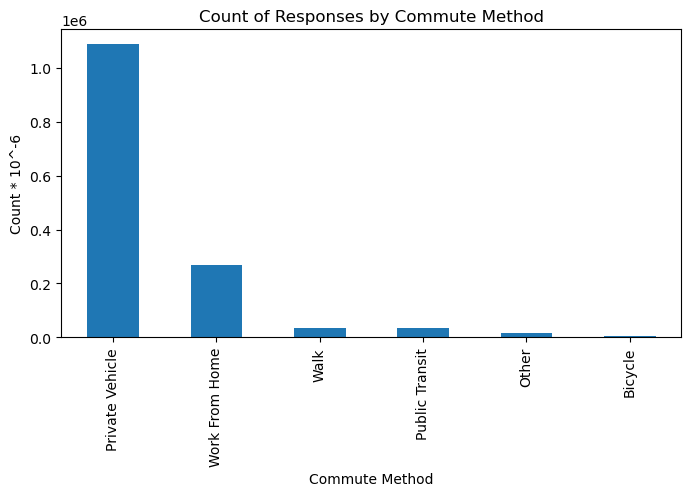

In [25]:
figure_name = plt.figure(figsize=(8, 4))
commute['transportation_type'].value_counts().plot(kind='bar', xlabel="Commute Method", ylabel="Count * 10^-6", title="Count of Responses by Commute Method")

This bar plot tells us the class distribution of the six commute methods from the dataset. As we can see, this data is very imbalanced, with private vehicles exceeding the others by nearly an order of magnitude. This will be an important consideration to make when deciding whether or not to over/under-sample for supervised learning.

<Axes: title={'center': 'Mean Income by Commute Method'}, xlabel='Commute Method', ylabel='Mean Income (USD)'>

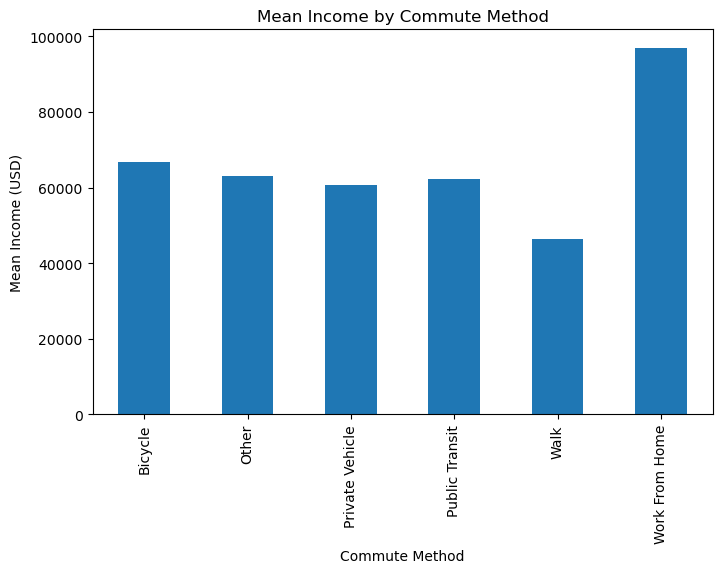

In [23]:
figure_name = plt.figure(figsize=(8, 5))
commute.groupby(['transportation_type'])['income'].agg('mean').plot.bar(xlabel="Commute Method",ylabel="Mean Income (USD)",title='Mean Income by Commute Method')

This bar chart provides valuable insights on the differences in mean income among commute methods. The two notable discrepancies are with those who primarily walk and those who primarily work from home, where the means are visually less and more than the population, respectively. While this visualization is not conclusive, we can recognize how this lines up with intuition. Work-from-home jobs are more likely to be white-collar and thus higher paying, while those who walk to work may do so due to its cost-effectiveness.

### Public Transit by City[^2]

In [34]:
cities = pd.read_csv('../data/cleaned_data/apta_cities_cleaned.csv')
cities = cities.drop(columns='Unnamed: 0')
cities.head()

,City,Population,Area,Cost_per_trip,Fare_per_trip,Miles_per_trip,Total_trips,Trips_per_capita
0,"Seattle--Tacoma, WA",3544011,982.52,13.906032,1.570667,5.786344,130093841,36.708080
1,"Spokane, WA",447279,171.67,13.433827,0.988308,4.772569,6995911,15.641045
2,"Yakima, WA",133145,55.77,19.720093,1.112531,5.179168,513484,3.856577
3,"Eugene, OR",270179,73.49,10.851494,2.753356,3.684118,5296214,19.602612
4,"Portland, OR--WA",2104238,519.30,10.804361,1.025659,4.011388,56312874,26.761647


The main things we'd like to know about this data are with respect to the relationships and correlations between variables, as well as the distribution of target variables. Ultimately, there are two metrics in this dataset which could be considered performance indicators for a city's public transity system: `Trips_per_capita` and `Cost_per_trip`. The former tells us how much a public transit system is used by its residents, essentially showing its usefulness as a means of transportation. The latter tells us the cost-effectiveness of a public transit system. A city that can maintain a low `Cost_per_trip` is more likely to consider public transit as a positive, rather than as a burden. Therefore, our exploratory analysis will relate to these goals.

<Axes: >

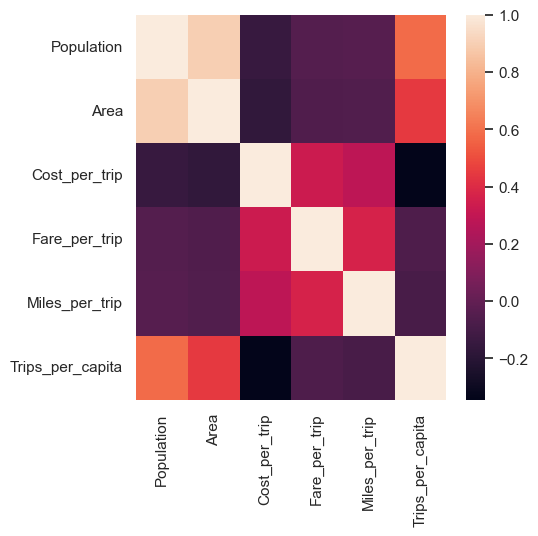

In [42]:

figure_name = plt.figure(figsize=(5, 5))
sns.heatmap(cities[['Population','Area','Cost_per_trip','Fare_per_trip','Miles_per_trip','Trips_per_capita']].corr(numeric_only=True))

The heatmap above was created using the `seaborn` package in Python. It gives us a good idea of which variables correlate with one another. Unsurprisingly, population and area are closely correlated. Regarding our target variables, `Trips_per_capita` appears to have significant positive correlation with both measures of a city's size, indicating that larger cities spend less per trip. Meanwhile, `Cost_per_trip` appears to be positively correlated with the fare and length of a trip, indicating that longer trips cost more to a city, and that cities charge more when the trips cost more to them. Finally, the largest negative correlation on this map is between `Cost_per_trip` and `Trips_per_capita`, which suggests that people may use public transit less when trips are more expensive.

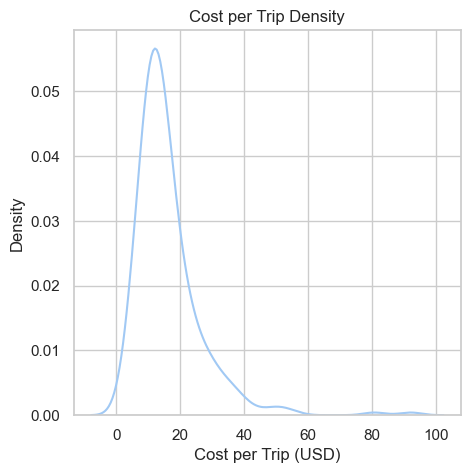

In [48]:

figure_name = plt.figure(figsize=(5, 5))
p = sns.kdeplot(np.array(cities['Cost_per_trip']))
p.set(xlabel="Cost per Trip (USD)", ylabel="Density", title="Cost per Trip Density")
plt.show()

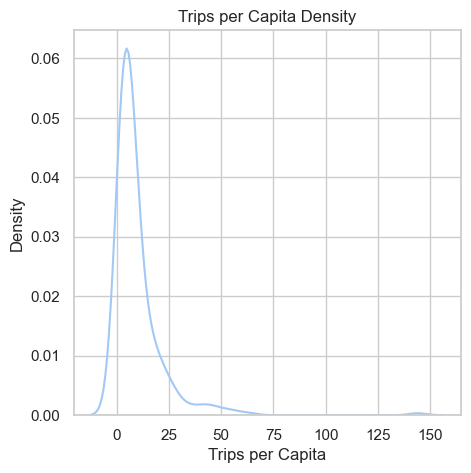

In [47]:

figure_name = plt.figure(figsize=(5, 5))
p = sns.kdeplot(np.array(cities['Trips_per_capita']))
p.set(xlabel="Trips per Capita", ylabel="Density", title="Trips per Capita Density")
plt.show()

The density plots above were also built using `seaborn`, in conjunction with `matplotlib`. From these, we can see similar stories. For both of our target variables, the vast majority of trips per capita and cost per trip are fairly low, while the graphs have large tails on the right side. We will want to analyze the extreme values for both of these variables and see what characteristics of a city lead to values so far from the center of the distribution.

### Yelp Reviews [^3] [^4] [^5] [^6] [^7] [^8] [^9]

In [10]:
yelp = pd.read_csv('../data/cleaned_data/yelp_cleaned.csv')
yelp = yelp.drop(columns='Unnamed: 0')
yelp.head()

,Rating,Date,Review,Agency
0,4,"Nov 3, 2023","What do I know, I'm just a stupid tourist who ...",mta
1,1,"Aug 23, 2023",This Company is A Literally A Gangsters Mafia ...,mta
2,1,"Nov 29, 2023",The Q65 bus tonight has no screens on to show ...,mta
3,1,"Oct 25, 2023",Why should customers pay $2.90 for buses that ...,mta
4,1,"Oct 16, 2023",Are MTA bus drivers supposed to ignore custome...,mta


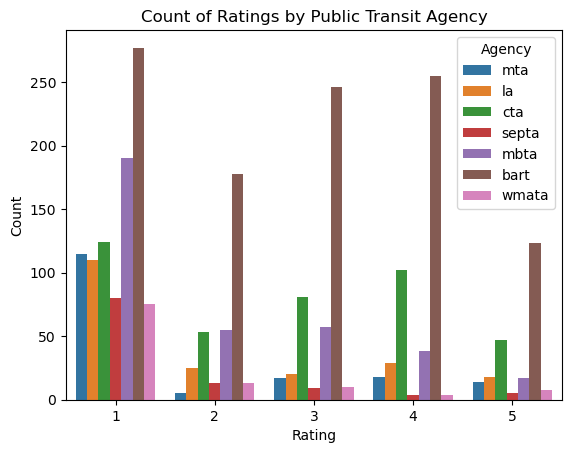

In [15]:
rating_order = [1,2,3,4,5]
x = sns.countplot(x = "Rating", data = yelp, order = rating_order, hue='Agency')
x.set(xlabel='Rating', ylabel='Count', title='Count of Ratings by Public Transit Agency')
plt.show()

### Work-from-Home Trends[^10]

In [19]:
wfh_monthly = pd.read_csv('../data/cleaned_data/WFH_city_cleaned.csv')
wfh_monthly = wfh_monthly.drop(columns='Unnamed: 0')
wfh_monthly[["Atlanta","Bay Area","Chicago","DC","Dallas","Houston","Los Angeles","Miami","New York"]].describe()

,Atlanta,Bay Area,Chicago,DC,Dallas,Houston,Los Angeles,Miami,New York
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,39.354286,38.928571,33.077143,36.657143,35.574286,33.628571,39.720000,36.051429,39.600000
std,4.645260,4.243789,2.730879,4.792107,3.920035,3.389306,4.212363,3.870429,3.671272
min,32.200000,32.300000,27.900000,30.000000,30.600000,28.200000,34.300000,30.000000,35.000000
25%,35.600000,36.050000,31.300000,32.850000,33.450000,31.450000,35.850000,34.100000,36.750000
50%,39.800000,39.300000,32.600000,37.900000,35.000000,33.600000,40.300000,36.100000,39.800000
75%,42.750000,41.500000,34.700000,39.500000,36.200000,35.250000,42.050000,37.550000,40.600000
max,53.200000,54.200000,41.500000,54.800000,51.900000,45.500000,53.700000,52.800000,52.500000


The first notable piece of information about this data is that it begins in October of 2020, which is well after the pandemic's effects began taking shape. However, the first data point represents data up to and including the information reached on that date, so it is sensible to think of it as an aggregate for the early pandemic. Thus, we should keep in mind that it may be an outlier, as it contains data from a greater date range, from a time that we might assume would have a greater work-from-home rate. The summary statistics above tell us little about the trends, so we will create a line graph to better visualize the data.

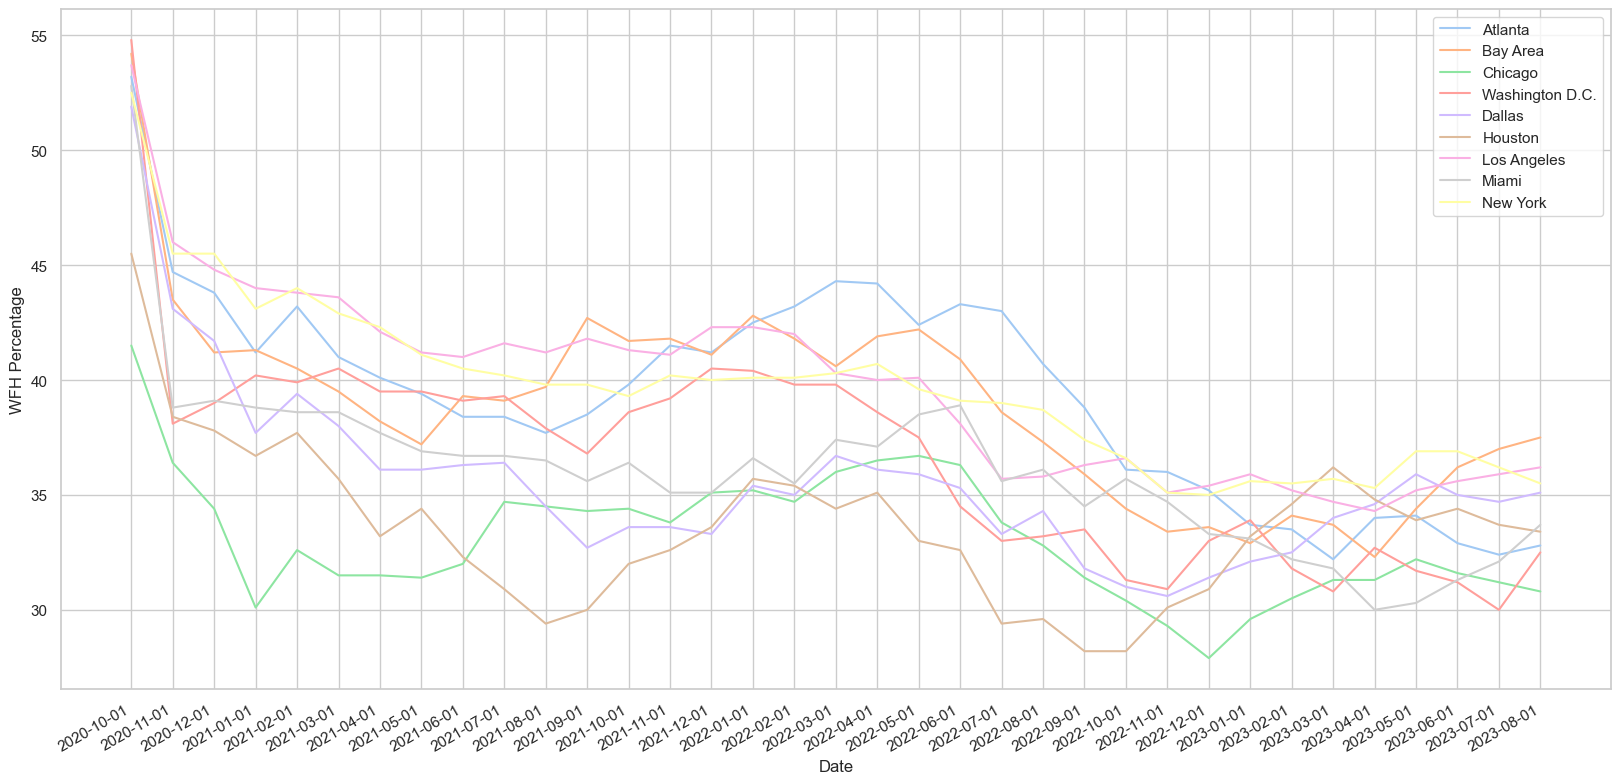

In [30]:

figure_name = plt.figure(figsize=(20, 10))
plt.plot(wfh_monthly['date'], wfh_monthly['Atlanta'], label ='Atlanta')
plt.plot(wfh_monthly['date'], wfh_monthly['Bay Area'], label ='Bay Area')
plt.plot(wfh_monthly['date'], wfh_monthly['Chicago'], label ='Chicago')
plt.plot(wfh_monthly['date'], wfh_monthly['DC'], label ='Washington D.C.')
plt.plot(wfh_monthly['date'], wfh_monthly['Dallas'], label ='Dallas')
plt.plot(wfh_monthly['date'], wfh_monthly['Houston'], label ='Houston')
plt.plot(wfh_monthly['date'], wfh_monthly['Los Angeles'], label ='Los Angeles')
plt.plot(wfh_monthly['date'], wfh_monthly['Miami'], label ='Miami')
plt.plot(wfh_monthly['date'], wfh_monthly['New York'], label ='New York')
plt.xlabel("Date")
plt.ylabel("WFH Percentage")
plt.legend()
plt.gcf().autofmt_xdate()
plt.show()

This line graph uses `matplotlib` and shows time series data on how work-from-home percentages have evolved over the course of the pandemic recovery. As we would expect, the highest values come from the earliest data point, which far exceeds any other values for all cities involved. The most notable thing about this data is how all cities follow the same general trend. There is a decline throughout most of 2021, followed by a minor rise at the start of 2022, again followed by a further decline to present day. At the time of the latest recording, all cities have between 30% and 40% of their working hours being done from home. This homogeneity will be notable when drawing conclusions relating to the entire country.

### Work-from-Home Desires

In evaluating the future of work-from-home, as well as the social impact it has, it is important to perform EDA on the work-from-home desires of both workers and employers. The summary statistics below show a reality that is expected: workers want more work-from-home days than employers, and both want fewer work-from-home days for workers who are able to work on-site.

In [9]:
wfh_desires = pd.read_csv('../data/cleaned_data/WFH_surveys_cleaned.csv')
wfh_desires = wfh_desires.drop(columns='Unnamed: 0')
wfh_desires[['employer_desires_all','employer_desires_able','worker_desires_all','worker_desires_able']].describe()

,employer_desires_all,employer_desires_able,worker_desires_all,worker_desires_able
count,38.000000,37.000000,38.000000,37.000000
mean,1.359211,2.045405,2.270526,2.807568
std,0.188628,0.278932,0.087763,0.096650
min,1.050000,1.560000,2.100000,2.550000
25%,1.177500,1.800000,2.190000,2.770000
50%,1.400000,2.210000,2.275000,2.810000
75%,1.530000,2.260000,2.320000,2.870000
max,1.610000,2.370000,2.470000,2.970000


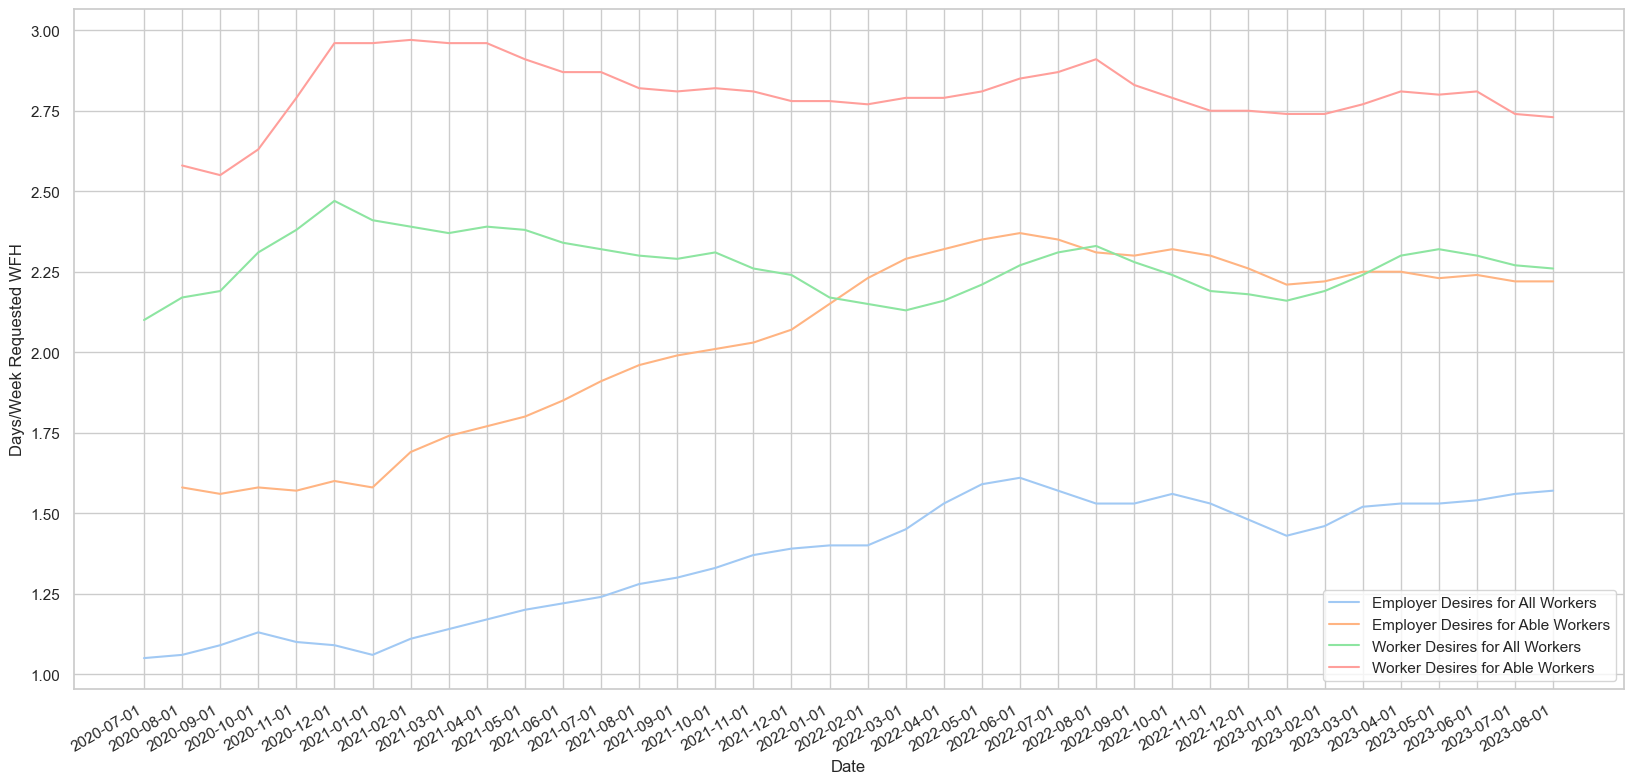

In [32]:
figure_name = plt.figure(figsize=(20, 10))
plt.plot(wfh_desires['date'], wfh_desires['employer_desires_all'], label='Employer Desires for All Workers')
plt.plot(wfh_desires['date'], wfh_desires['employer_desires_able'], label='Employer Desires for Able Workers')
plt.plot(wfh_desires['date'], wfh_desires['worker_desires_all'], label='Worker Desires for All Workers')
plt.plot(wfh_desires['date'], wfh_desires['worker_desires_able'], label='Worker Desires for Able Workers')
plt.xlabel("Date")
plt.ylabel("Days/Week Requested WFH")
plt.legend()
plt.gcf().autofmt_xdate()
plt.show()

Using this `matplotlib`-generated plot, we can see time series data for the four categories. The observations noted above remain true, but there is a clear trend that should be pointed out regarding employer desires. While workers seem to have generally maintained the same expected number of work-from-home days, employers have increased their appetite for more work-from-home days. Further analysis should examine causes for this phenomenon, which could be caused by realizations that work-from-home has merit in some cases, a changing political climate, simply conceding ground to their counterparts, or perhaps an undiscovered reason.

Thus, our hypotheses regarding this data set are:
1. Workers desire more work-from-home days/week than employers
2. Work-from-home desires have remained the same over time

### Public Transportation Type[^11]

This data can provide valuable insight on which forms of public transportation have been most affected. Based on what we can conclude here, there may be indications that some methods should be studied with more emphasis. The summary statistics for this data offer a simple understanding of ridership volume and which methods are used most. However, the bulk of our EDA will focus on correlation between variables to evaluate how these methods' ridership change alongside one another.

In [11]:
ridership_type = pd.read_csv('../data/cleaned_data/ridership_by_quarter_cleaned.csv')
ridership_type = ridership_type.drop(columns='Unnamed: 0')
ridership_type[['total_ridership','heavy_rail','light_rail','commuter_rail','trolleybus','bus','demand_response','other']].describe()

,total_ridership,heavy_rail,light_rail,commuter_rail,trolleybus,bus,demand_response,other
count,5.300000e+01,5.300000e+01,53.000000,53.000000,53.000000,5.300000e+01,53.000000,53.000000
mean,2.279058e+06,8.269957e+05,113075.698113,104419.962264,19331.075472,1.125994e+06,47151.716981,42090.377358
std,5.826479e+05,2.299050e+05,30778.435641,32376.278023,5935.076336,2.695039e+05,10558.336191,11875.951653
min,6.209250e+05,1.222490e+05,33137.000000,13521.000000,3395.000000,4.205780e+05,16907.000000,11140.000000
25%,2.361673e+06,8.339910e+05,112616.000000,109741.000000,19598.000000,1.133805e+06,46331.000000,40588.000000
50%,2.538958e+06,9.270570e+05,125865.000000,119043.000000,21395.000000,1.234299e+06,51334.000000,45071.000000
75%,2.624985e+06,9.682590e+05,133233.000000,125486.000000,23740.000000,1.312650e+06,53673.000000,49803.000000
max,2.729424e+06,1.015234e+06,140828.000000,130970.000000,25051.000000,1.364993e+06,59535.000000,57254.000000


/Users/joshsweren/anaconda3/envs/dsan5000/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


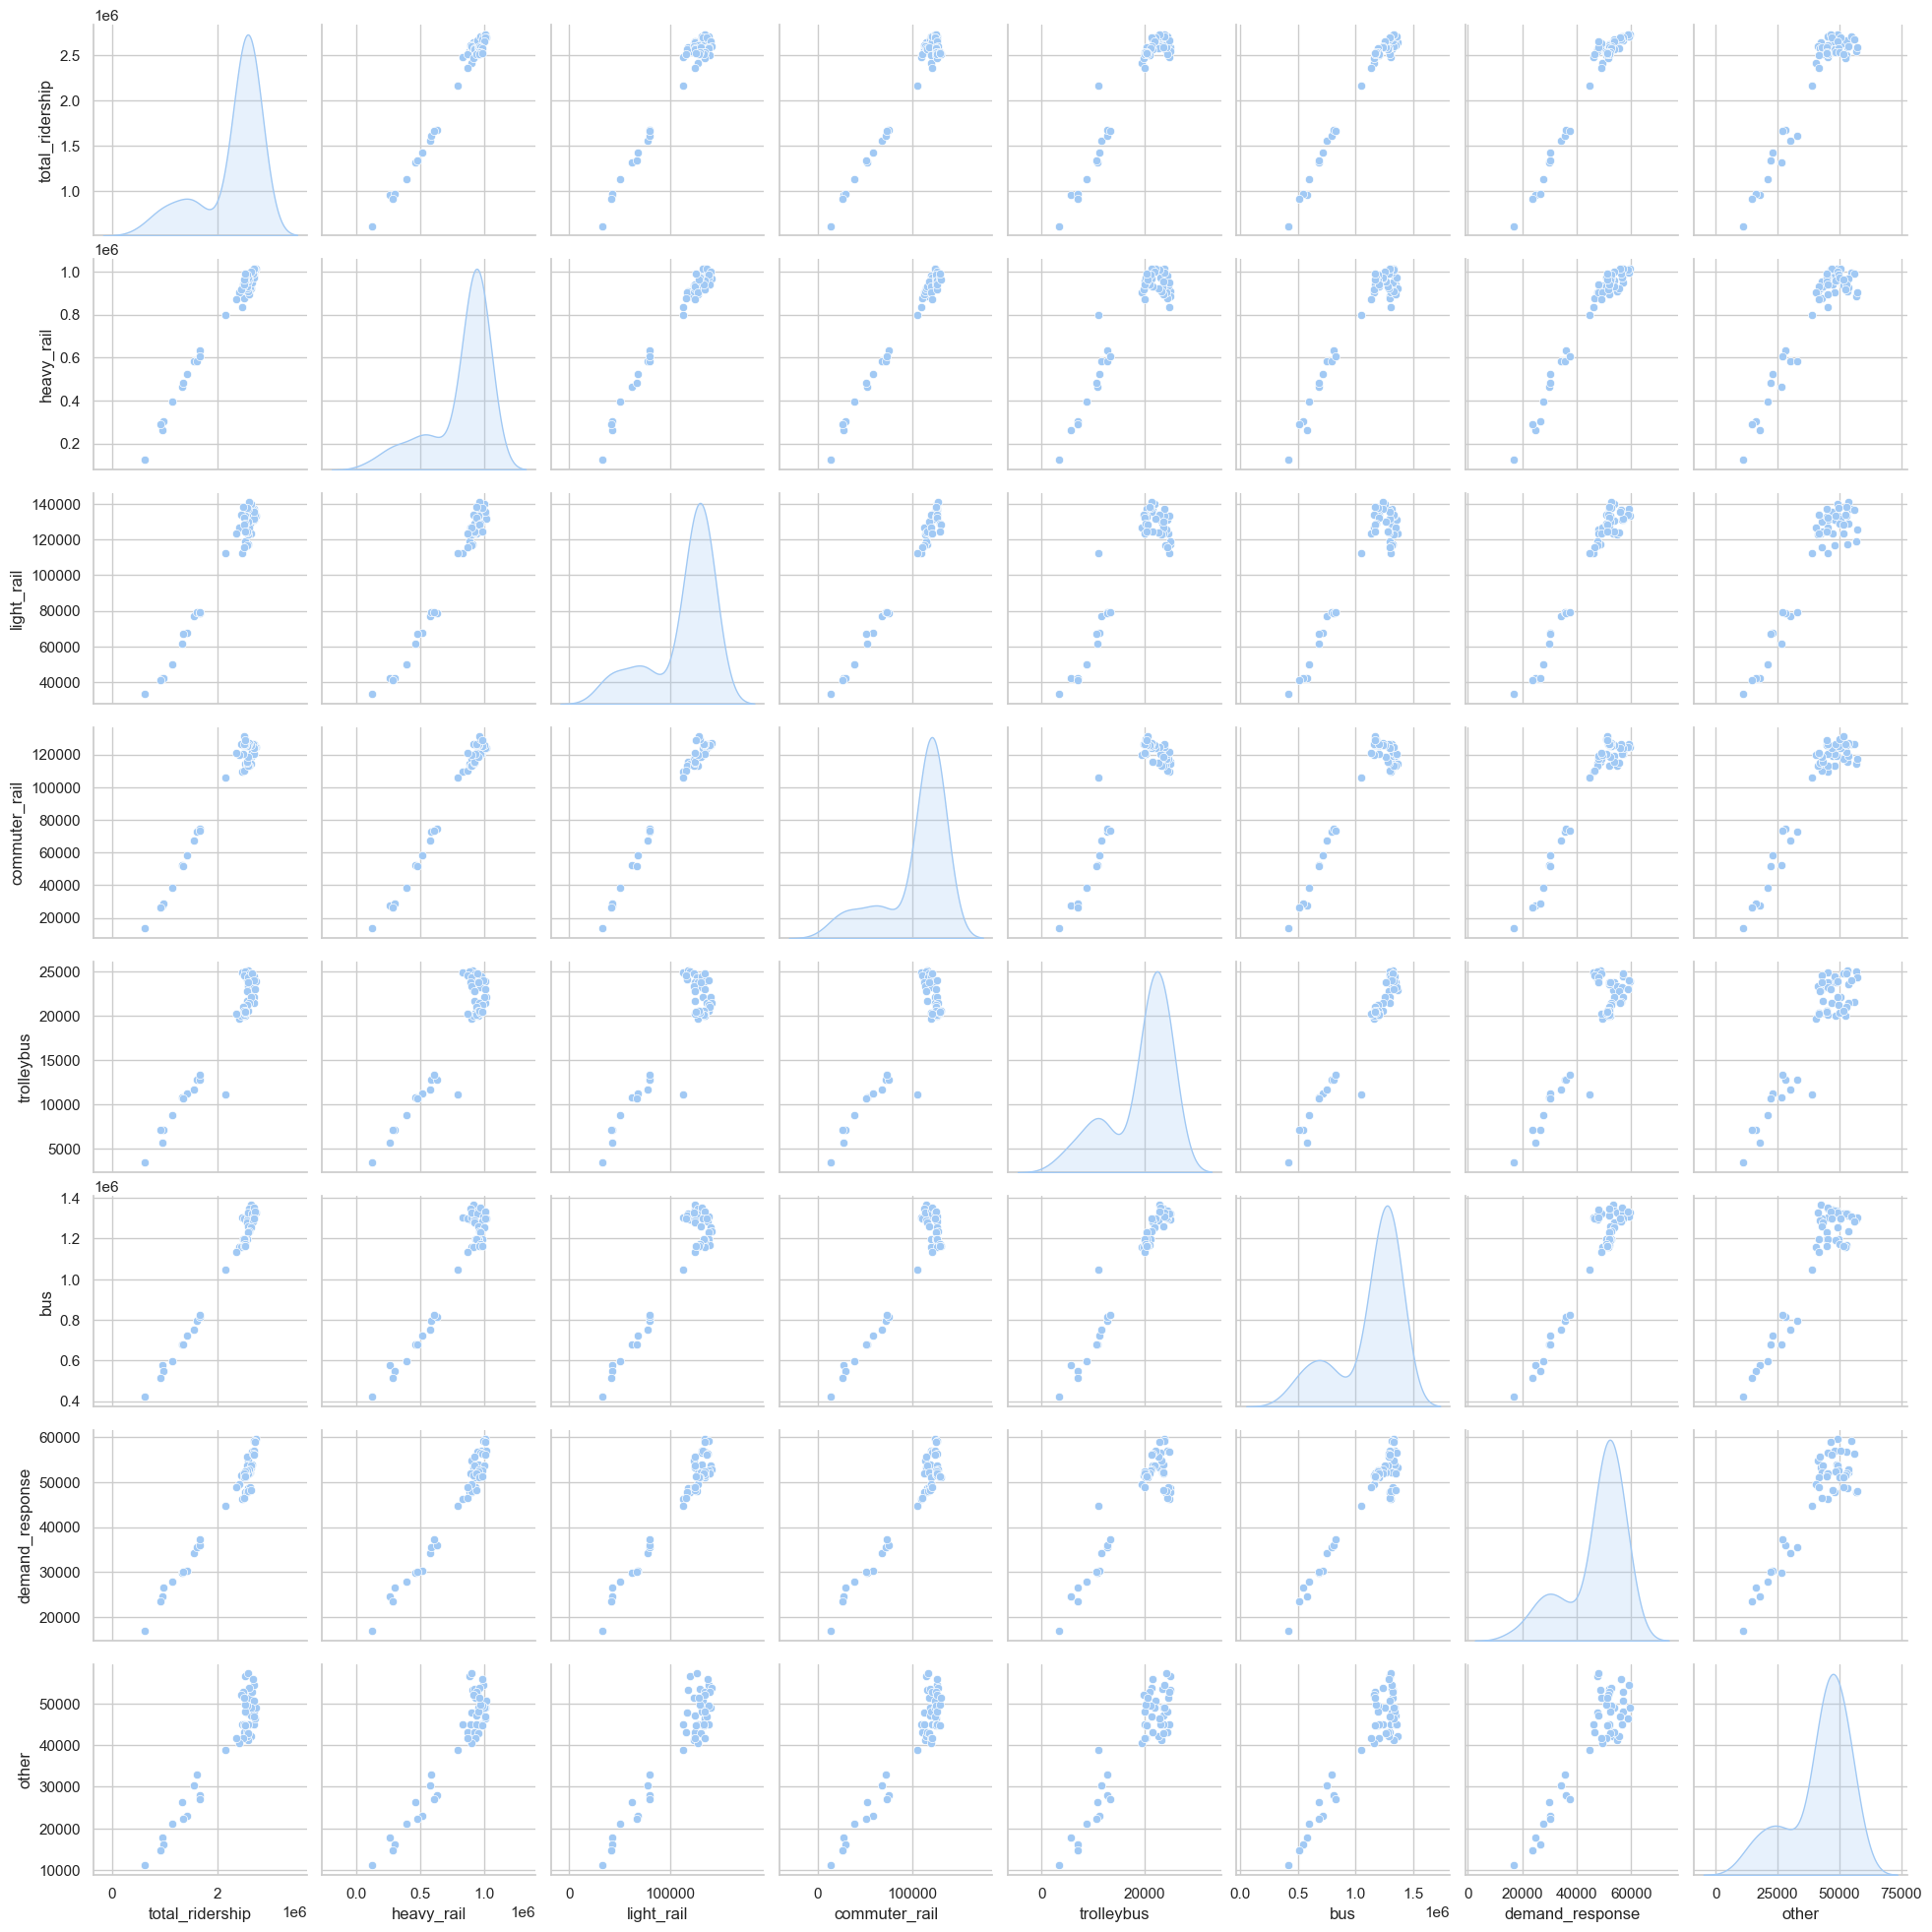

In [12]:
sns.pairplot(ridership_type[['total_ridership','heavy_rail','light_rail','commuter_rail','trolleybus','bus','demand_response','other']], diag_kind='kde', kind="scatter")

                 total_ridership  heavy_rail  light_rail  commuter_rail   
total_ridership         1.000000    0.989721    0.978829       0.979993  \
heavy_rail              0.989721    1.000000    0.987208       0.991768   
light_rail              0.978829    0.987208    1.000000       0.990598   
commuter_rail           0.979993    0.991768    0.990598       1.000000   
trolleybus              0.959039    0.923241    0.901781       0.906034   
bus                     0.987325    0.955084    0.941736       0.940388   
demand_response         0.975021    0.976711    0.971167       0.960878   
other                   0.941060    0.932013    0.933872       0.939074   

                 trolleybus       bus  demand_response     other  
total_ridership    0.959039  0.987325         0.975021  0.941060  
heavy_rail         0.923241  0.955084         0.976711  0.932013  
light_rail         0.901781  0.941736         0.971167  0.933872  
commuter_rail      0.906034  0.940388         0.960878  

<Axes: >

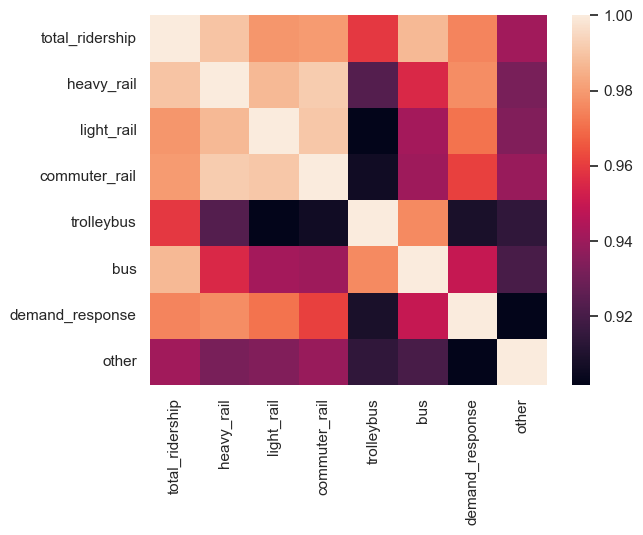

In [13]:
print(ridership_type[['total_ridership','heavy_rail','light_rail','commuter_rail','trolleybus','bus','demand_response','other']].corr(method='pearson',numeric_only=True))
sns.heatmap(ridership_type[['total_ridership','heavy_rail','light_rail','commuter_rail','trolleybus','bus','demand_response','other']].corr(numeric_only=True))

By using the `seaborn` package, we can obtain a pairplot, a correlation matrix, and a heatmap to visualize correlation between the ridership of different modes of public transportation. From this, we can see that no Pearson correlation fails to exceed 0.9, indicating strong correlation between all variables. Thus, our refined hypothesis is that all methods of public transportation are impacted equally by the decline and/or resurgence of public transit usage.



[^1]: Steven Ruggles, Sarah Flood, Matthew Sobek, Danika Brockman, Grace Cooper,  Stephanie Richards, and Megan Schouweiler. IPUMS USA: Version 13.0 [dataset]. Minneapolis, MN: IPUMS, 2023.
https://doi.org/10.18128/D010.V13.0

[^2]: “Raw monthly ridership (no adjustments or estimates),” Raw Monthly Ridership (No Adjustments or Estimates) | FTA, https://www.transit.dot.gov/ntd/data-product/monthly-module-raw-data-release (accessed Nov. 14, 2023).

[^3]: “Metropolitan Transportation Authority - New York, NY,” Yelp, https://www.yelp.com/biz/metropolitan-transportation-authority-new-york-6 (accessed Nov. 14, 2023).

[^4]: “Metro Los Angeles - Los Angeles, CA,” Yelp, https://www.yelp.com/biz/wmata-washington (accessed Nov. 14, 2023).

[^5]: “Chicago Transit Authority - Chicago, IL,” Yelp, https://www.yelp.com/biz/metro-los-angeles-los-angeles (accessed Nov. 14, 2023).

[^6]: “Septa - Philadelphia, PA,” Yelp, https://www.yelp.com/biz/septa-philadelphia-7 (accessed Nov. 14, 2023).

[^7]: “Massachusetts Bay Transportation Authority - Boston, MA,” Yelp, https://www.yelp.com/biz/massachusetts-bay-transportation-authority-boston (accessed Nov. 14, 2023).

[^8]: “WMATA - Washington, DC, DC,” Yelp, https://www.yelp.com/biz/wmata-washington (accessed Nov. 2, 2023). 

[^9]: “Bart - Bay Area Rapid Transit - Oakland, CA,” Yelp, https://www.yelp.com/biz/bart-bay-area-rapid-transit-oakland-2 (accessed Nov. 2, 2023). 

[^10]: Barrero, Jose Maria, et al. Why Working from Home Will Stick, 2021, https://doi.org/10.3386/w28731.

[^11]: “Ridership Report.” American Public Transportation Association, 21 Sept. 2023, www.apta.com/research-technical-resources/transit-statistics/ridership-report/. 